#### Sales Analysis

Import Necessary Libraries

In [65]:
import pandas as pd
import os

#### Task 1:Merge the 12 month of sales data into a single CSV file

In [66]:
files = [file for file in os.listdir("E:/kartik sharma/data analyst/Python_Project/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("E:/kartik sharma/data analyst/Python_Project/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])    

all_months_data.to_csv("all_data.csv",index=False)

#### Read in updates dataframe

In [67]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data!

##### Drop Rows of NaN

In [68]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Find 'Or' and delete it

In [69]:
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']

##### Convert columns to the correct type

In [70]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augument data with additional columns

### Task 2:Add Month Column

In [71]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [72]:
all_data["Sales"] = all_data["Quantity Ordered"]* all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column

In [153]:
 # Let's use .apply()
def get_city(address):
    return str(address).split(",")[1]

def get_state(address):
    return str(address).split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


#### Question 1: what was the best month for sales? How much earned that month?

In [157]:
results = all_data.groupby(["Month"]).sum(numeric_only=True)
results.head()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,
1,10903,1811768.38,1822256.73,139485,282440,9709
2,13449,2188884.72,2202022.42,172669,354885,11975
3,17005,2791207.83,2807100.38,218969,447559,15153
4,20558,3367671.02,3390670.24,262259,544186,18279
5,18667,3135125.13,3152606.75,238780,487899,16566


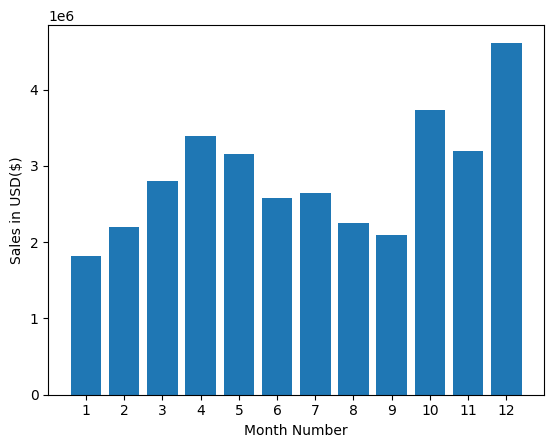

In [88]:
import matplotlib.pyplot as plt

months =range(1,13)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month Number")
plt.show()


#### Question 2: What city had the hightest number of sales?

In [144]:
result = all_data.groupby(["City"]).sum(numeric_only=True)
print(result)

                    Quantity Ordered  Price Each   Month       Sales    Hour  \
City                                                                           
Atlanta (GA)                   16602  2779908.20  104794  2795498.58  214264   
Austin (TX)                    11153  1809873.61   69829  1819581.75  141946   
Boston (MA)                    22528  3637409.77  141112  3661642.01  288225   
Dallas (TX)                    16730  2752627.82  104620  2767975.40  214390   
Los Angeles (CA)               33289  5421435.23  208325  5452570.80  427444   
New York City (NY)             27932  4635370.83  175741  4664317.43  357696   
Portland (ME)                   2750   447189.25   17144   449758.27   35211   
Portland (OR)                  11303  1860558.22   70621  1870732.34  144421   
San Francisco (CA)             50239  8211461.74  315520  8262203.91  643265   
Seattle (WA)                   16553  2733296.01  104941  2747755.48  213292   

                     Minute  Count  
Ci

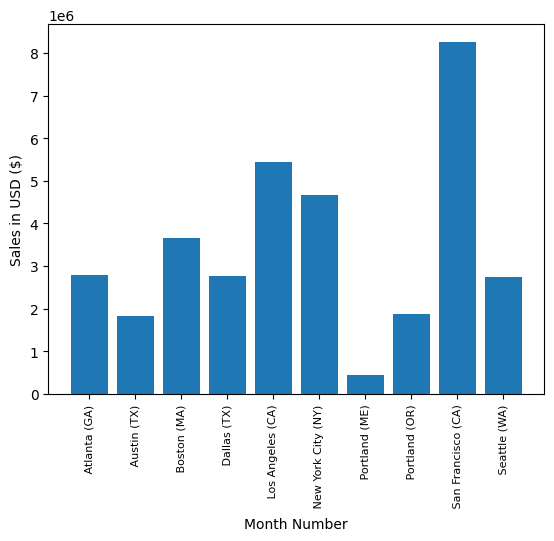

In [150]:
import matplotlib.pyplot as plt

cities = [city for city,df in all_data.groupby("City")]
plt.bar(cities,result["Sales"])
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.xticks(cities,rotation = "vertical",size = 8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [81]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

C:\Users\Prince Kumar\AppData\Local\Temp\ipykernel_18924\2617628323.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


In [129]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data["Count"] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


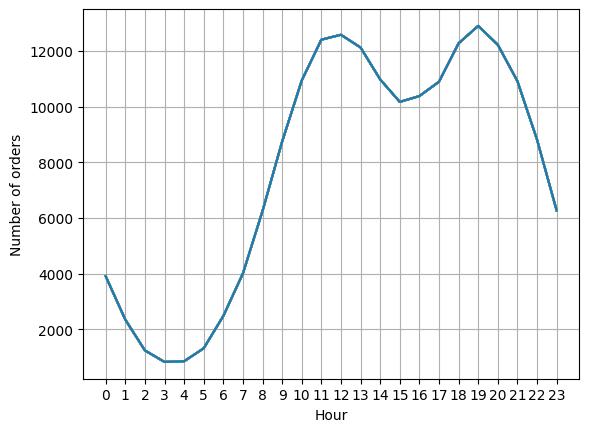

In [94]:
hours = [hour for hour,df in all_data.groupby("Hour")]

plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [103]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()
df.head()

C:\Users\Prince Kumar\AppData\Local\Temp\ipykernel_18924\1652231538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [110]:
 from itertools import combinations
from collections import Counter 

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What products sold the most? Why do you think it sold the most?

In [130]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


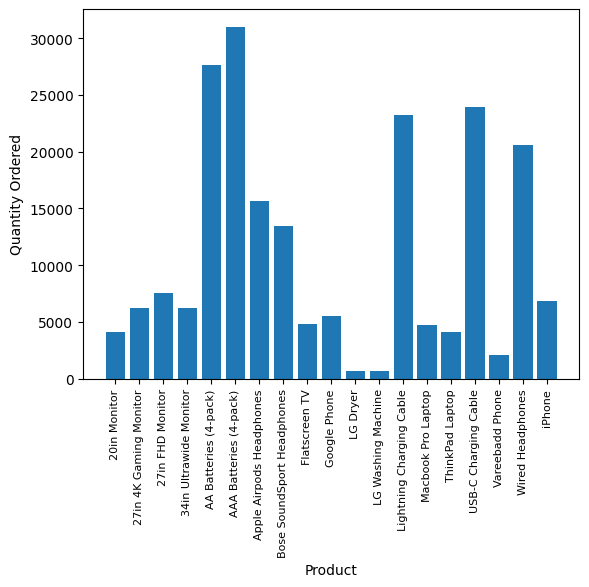

In [120]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum(numeric_only=True)["Quantity Ordered"]

products = [product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(products,rotation = "vertical",size = 8)
plt.show()

C:\Users\Prince Kumar\AppData\Local\Temp\ipykernel_18924\1270459997.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation = "vertical",size =8)


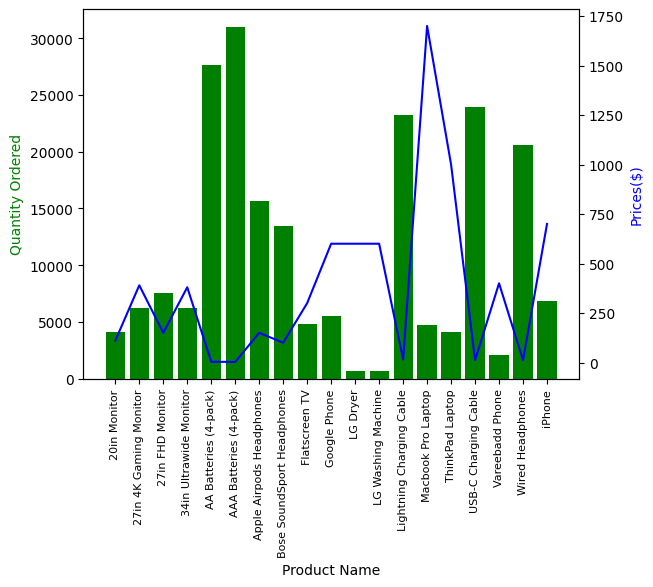

In [127]:
prices = all_data.groupby("Product").mean(numeric_only =True)["Price Each"]

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color="g")
ax2.plot(products,prices,"b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered",color = "g")
ax2.set_ylabel("Prices($)",color = "b")
ax1.set_xticklabels(products,rotation = "vertical",size =8)

plt.show()